In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import stats

In [2]:
# read in data file
data = pd.read_csv('data.txt', delimiter = "\t")
data

,x,y,y_std
0,0.5488,0.8243,0.0529
1,0.7152,1.1299,0.1548
2,0.6028,0.8912,0.0912
3,0.5449,0.7326,0.1137
4,0.4237,0.7115,0.0038
5,0.6459,1.0423,0.1235
6,0.4376,0.7381,0.1224
7,0.8918,1.2995,0.1234
8,0.9637,1.2154,0.1887
9,0.3834,0.6087,0.1364


Text(0.5, 1.0, 'y vs x')

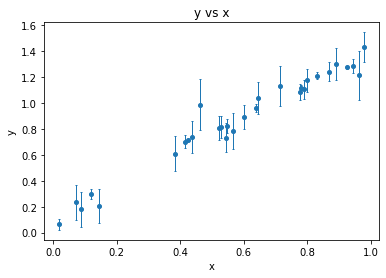

In [3]:
# plot data from file
plt.errorbar(data.x, data.y,data.y_std,lw=0,elinewidth=1,capsize=1,marker='.',markersize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')

In [4]:
# negative log likelihood function
def negLL(params,x,y,std):
    a = params[0]
    b = params[1]
    c = params[2]
    yEst = a + b*x + c*x**2
    return (-np.sum(stats.norm.logpdf(y,yEst,std)))

In [5]:
# quadratic model
init = [1,1,1] # parameters a,b,c initial conditions
model = minimize(negLL, init, args=(data.x,data.y,data.y_std))
print(model)

      fun: -46.23630227420975
 hess_inv: array([[ 0.00111804, -0.00387796,  0.00294209],
       [-0.00387796,  0.01381781, -0.01072338],
       [ 0.00294209, -0.01072338,  0.00857502]])
      jac: array([-9.77516174e-05, -1.43051147e-06, -4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 158
      nit: 9
     njev: 37
   status: 2
  success: False
        x: array([ 0.06881088,  1.69306919, -0.42081526])


In [6]:
# best fit a,b,c parameters
print(model.x)

[ 0.06881088  1.69306919 -0.42081526]


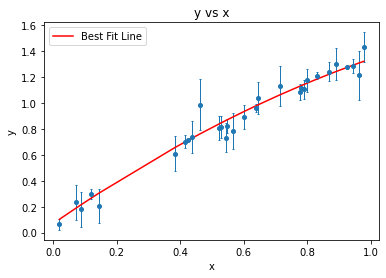

In [7]:
# plot data from file
plt.errorbar(data.x, data.y,data.y_std,lw=0,elinewidth=1,capsize=1,marker='.',markersize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')

# plot quadratic best fit line
a,b,c = model.x
x = np.sort(data.x)
ymodel = a + b*x + c*x**2
plt.plot(x,ymodel,color = 'red', label = 'Best Fit Line')
plt.legend()